In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from opt_unconstrained_model2 import posterior
import time

In [2]:
df = pd.read_csv('preprocessed_curves_2.csv',index_col='idx')
df.dropna(axis=0, inplace=True)

C:\Users\Michele\AppData\Local\Temp\ipykernel_8156\2893590312.py:1: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('preprocessed_curves_2.csv',index_col='idx')


In [8]:
random_idx = np.random.permutation(range(6493))[:1000]

In [9]:
y = np.array(df.iloc[1,random_idx])
x = np.array(df.iloc[7:,random_idx])
T = np.linspace(0,1,len(x))
def prior_kernel(s,t):
    return np.exp(-(t-s)**2)
sigma = 1

In [10]:
p = posterior(T,np.transpose(x),y,prior_kernel, sigma)

In [11]:
start = time.time()
fitted_values = p.fitted_values()
perf = time.time()-start
perf

366.01323676109314

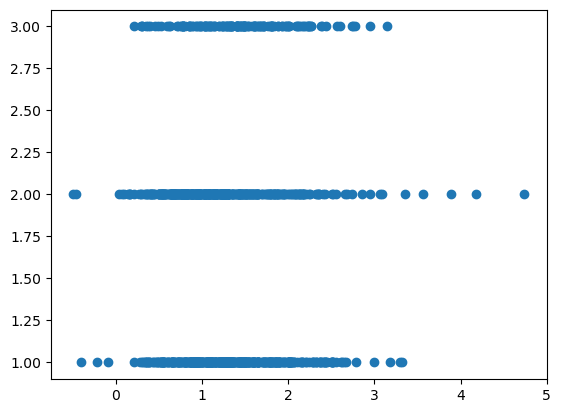

In [12]:
plt.scatter(fitted_values,y)